In [16]:
from statistics import stdev
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#sample space:from 1-37 numbers
l=[i for i in range(37)]
#red :1-19(total sample space of red:18 with probability 18/37 out of total sample space)
red=[i for i in range(1,19)]

In [17]:
# Betting on Red
def A():
    won,lose=0,0
    bet=1
    random.shuffle(l)
    #if we win the chance, we get 1$ or if we miss, we lose 1$
    
    if random.choice(l) in red:
        won+=1
    else:
        lose-=1
    money=won-abs(lose)
    return [money,bet]

In [18]:
#Betting on a Number
def B():
    won,lose=0,0
    bet=1
    random.shuffle(l)
    #if we win the chance, we get 35$ and if we miss, we lose 1$
    if random.randrange(37)==random.choice(l):
        won+=35
    else:
        lose-=1
    money=won-abs(lose)
    return [money,bet]

In [19]:
#Martingale System
def C():
    won=0
    lose=0
    prev_bet=1
    no_of_bets=0
    #this game will be continued till we have won 10$ or our bet exceeds 100$
    while(won<10 and prev_bet<=100):
        no_of_bets+=1
        random.shuffle(l)
        if random.choice(l) in red:
            won+=1
            prev_bet=1
            lose=0
        else:
            lose-=prev_bet
            prev_bet=prev_bet*2
    money=won-abs(lose)
    return [money,no_of_bets]


In [20]:
#Labouchere System
def D():
    lst=[1,2,3,4]
    bet=lst[0]+lst[-1]
    won,lose=0,0
    no_of_bets=0
    #this game will continue till we have left am empty list or bet exceeds 100$
    while(len(lst)>0 and bet<=100):
        no_of_bets+=1
        if len(lst)==1:
            bet=l[0]
        else:
            bet=lst[0]+lst[-1]
        random.shuffle(l)
        if random.choice(l) in red:
            won+=bet
            lst.pop(0)
            if len(lst)!=0:
                lst.pop()
        else:
            lose-=bet
            lst.append(bet)
    money=won-abs(lose)
    return [money,no_of_bets]

#function to count how many times we win or loose for a particular game
def wl_cnt(fn,n):
    no_of_win,no_of_lose=0,0
    for i in range(n):
        if fn()[0]<0:
            no_of_lose+=1
        else:
            no_of_win+=1
    return [no_of_win,no_of_lose]

In [11]:
#Program that estimates 1,2 and 3 by simulation 100,000 repetiitons of each game.
#If we lose money we lost the game or if we make money we won the game....

In [1]:
#this function will run for 100000 simulation for all A,B,C,D game
def Simulation():
    n=100000
    #Simulation of B
    def s_A():
        exp_val=(18/37)+(-19/37)
        k=wl_cnt(A,n)
        win_proportion=k[0]/n
        exp_play_time=A()[1]
        max_amt_can_win='1$'
        max_amt_can_lose='1$'
        print("**************A**************************")
        print(f"Expected winnings per game {exp_val}")
        print(f"Proportion of game you win {win_proportion}")
        print(f"Expected playing time per game {exp_play_time}")
        print(f"The maximum amount you can lose {max_amt_can_lose}")
        print(f"The maximum amount you can win {max_amt_can_win}")
    #Simulation of B
    def s_B():
        exp_val=35*(1/37)+(-36/37)
        k=wl_cnt(B,n)
        win_proportion=k[0]/n
        exp_play_time=B()[1]
        max_amt_can_win='35$'
        max_amt_can_lose='1$'
        print("**************B**************************")
        print(f"Expected winnings per game {exp_val}")
        print(f"Proportion of game you win {win_proportion}")
        print(f"Expected playing time per game {exp_play_time}")
        print(f"The maximum amount you can lose {k[1]}")
        print(f"The maximum amount you can win {k[0]}")
    #Simulation of C    
    def s_C():
        exp_val=1-(38/37)**8
        no_of_win,no_of_lose,k=0,0,0
        for i in range(n):
            fn=C()
            if fn[0]==-1:
                no_of_lose+=1
            else:
                no_of_win+=1
            k+=fn[1]
        win_proportion=no_of_win/n
        exp_play_time=k/n
        max_amt_can_win='10$'
        max_amt_can_lose='255$'
        print("**************C**************************")
        print(f"Expected winnings per game {exp_val}")
        print(f"Proportion of game you win {win_proportion}")
        print(f"Expected playing time per game {exp_play_time}")
        print(f"The maximum amount you can lose per game{max_amt_can_lose}")
        print(f"The maximum amount you can win per game{max_amt_can_win}")
    
    #Simulation of B
    def s_D():
        exp_val=None
        x=wl_cnt(D,n)
        print("**************D**************************")
        print(f"Total no. of win-{x[0]}")
        print(f"Total no. of lose-{x[1]}")
        
    
    #please uncomment the corresponding function for 100000 the simulation 
#     s_A()
#     s_B()
#     s_C()
#     s_D()
        
              
                             
Simulation()

In [7]:
#method which return the percentage error
def perc_error(a,e):
    p=abs(((a-e)/e)*100)
    return p

In [41]:
#1-expected winnigs per game;
#2-proportion of games you win;
#3-The expected playing time, measured by the no. of bets made;
#4-The maximum amount you can lose;
#5-The maximum amount you can win;
def verification():
    n=100000
    #1(expected winning per game) for A
    k=wl_cnt(A,n)
    actual_val=abs((abs(k[0])-abs(k[1]))/n)
    estimated_val=abs((18/37)-(19/37))
    p=perc_error(actual_val,estimated_val)
    print(f'percentage error in expected winning for A-{p}')
    
    #2(winning proportion) for A
    k=wl_cnt(A,n)
    estimated_val=(18/37)*100
    actual_val=(k[0]/n)*100
    p=perc_error(actual_val,estimated_val)
    print(f'percentage error in winning proportion for A-{p}')    
    
    #1(expected winning per game) for B
    x,y=0,0
    for i in range(n):
        if B()[0]<0:
            x+=1
        else:
            y+=35
    actual_val=abs((x-y)/n)
    estimated_val=abs((35/37)-(36/37))
    p=perc_error(actual_val,estimated_val)
    print(f'percentage error in expected winning for B-{p}') 
    
    
    #2(winning proportion) for B
    k=wl_cnt(B,n)
    actual_val=abs(k[0]/n)
    estimated_val=abs(1/37)
    p=perc_error(actual_val,estimated_val)
    print(f'percentage error in winning proportion for B-{p}') 
    
    #4,5(maximum amount we can win or lose)for A
    k=wl_cnt(A,n)
    print(f"Maximum amount you can lose in game A-{k[1]}")
    print(f"Maximum amount you can win in game A-{k[0]}")
    
    #4,5(maximum amount we can win or lose) for B
    x,y=0,0
    for i in range(n):
        if B()[0]<0:
            x+=1
        else:
            y+=35
    print(f"Maximum amount you can lose in game B-{x}")
    print(f"Maximum amount you can win in game B-{y}")

    #4,5(maximum amount we can win or lose) for C
    x,y=0,0
    for i in range(n):
        if C()[0]<0:
            x+=C()[0]
        else:
            y+=C()[0]
    print(f"Maximum amount you can lose in game C-{x}")
    print(f"Maximum amount you can win in game C-{y}")
    
verification()

percentage error in expected winning for A-6.019999999999816
percentage error in winning proportion for A-0.2514999999999933
percentage error in expected winning for B-72.86399999999963
percentage error in winning proportion for B-0.10000000000000668
Maximum amount you can lose in game A-51180
Maximum amount you can win in game A-48820
Maximum amount you can lose in game B-97290
Maximum amount you can win in game B-94850
Maximum amount you can lose in game C--18771
Maximum amount you can win in game C--176283


0.026788
0.037432


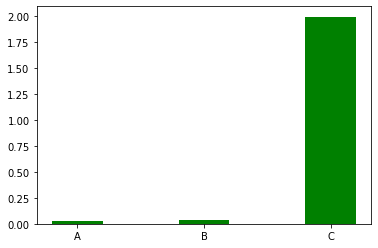

  Exp. winnings min-max   Prop. win min-max Exp. Play time min-max
A    (0.02384, 0.02906)  (0.48547, 0.48808)                 (1, 1)
B    (0.01756, 0.06328)  (0.02602, 0.02729)                 (1, 1)
C    (1.91306, 2.05456)  (0.90911, 0.91014)   (19.50566, 19.53345)


In [40]:
#This block of code takes a longer time for execution
a_data=[]
b_data=[]
c_data=[]
def variation():
    exp_win=[]
    exp_prop=[]
    exp_play_time=[]
    n=100000
    def for_A():
        
        for i in range(5):
            k=wl_cnt(A,n)
            x=abs((k[1]-k[0])/n)
            exp_win.append(abs(x))
            exp_prop.append(k[0]/n)
        g1=sum(exp_win)/5
        print(g1)
        a_data.append((min(exp_win),max(exp_win)))
        a_data.append((min(exp_prop),max(exp_prop)))
        a_data.append((1,1))
        exp_win.clear()
        exp_prop.clear()
        exp_play_time.clear()
        return g1

    
    def for_B():
        for i in range(5):
            k=wl_cnt(B,n)
            x=abs((k[1]-35*k[0])/n)
            exp_win.append(abs(x))
            exp_prop.append(k[0]/n)
        g2=sum(exp_win)/5
        print(g2)
        b_data.append((min(exp_win),max(exp_win)))
        b_data.append((min(exp_prop),max(exp_prop)))
        b_data.append((1,1))
        exp_win.clear()
        exp_prop.clear()
        exp_play_time.clear()
        return g2

        
    def for_C():
        for i in range(5):
            x,a,k,y=0,0,0,0
            for i in range(n):
                fn=C()
                if fn[0]<0:
                    x+=fn[0]
                else:
                    y+=fn[0]
                    a+=1
                k+=fn[1]
            exp_win.append(abs((x+y)/n))
            exp_prop.append(a/n)
            exp_play_time.append(k/n)
        g3=sum(exp_win)/5
        c_data.append((min(exp_win),max(exp_win)))
        c_data.append((min(exp_prop),max(exp_prop)))
        c_data.append((min(exp_play_time),max(exp_play_time)))
        return g3
        
    
    g1=for_A()
    g2=for_B()
    #this method takes time to excute
    g3=for_C()
    #graph for the expecting winning of A,B,C
    x=np.array(['A','B','C'])
    y=np.array([g1,g2,g3])
    plt.bar(x,y,width=0.4,color="green")
    plt.show()
    
    
#     dataframe
    data=[a_data,b_data,c_data]
    df=pd.DataFrame(data,columns=['Exp. winnings min-max','Prop. win min-max','Exp. Play time min-max'])
    index=pd.Index(['A','B','C'])
    df=df.set_index(index)
    print(df)
    

variation()
    